In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv("/home/schanx/Documents/NeuHack/HackNEU/Hack2017GradCS/shantanu/household_power_consumption.txt", delimiter=";", usecols = ['Sub_metering_3'], low_memory=False)
df[190700:190780]

,Sub_metering_3
190700,NaN
190701,NaN
190702,NaN
190703,NaN
190704,NaN
190705,NaN
190706,NaN
190707,NaN
190708,NaN
190709,NaN


In [45]:
df=df.dropna()
#df=df[df["Sub_metering_3"] != NaN]
#df["Sub_metering_3"].to_csv("/home/schanx/Documents/NeuHack/HackNEU/Hack2017GradCS/shantanu/g6.csv")
df.to_csv("/home/schanx/Documents/NeuHack/HackNEU/Hack2017GradCS/shantanu/g6.csv")

In [46]:
x = df['Sub_metering_3'].astype(float)

In [47]:
x = x.mean()

In [48]:
x

6.45844735712055

/home/schanx/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2049281


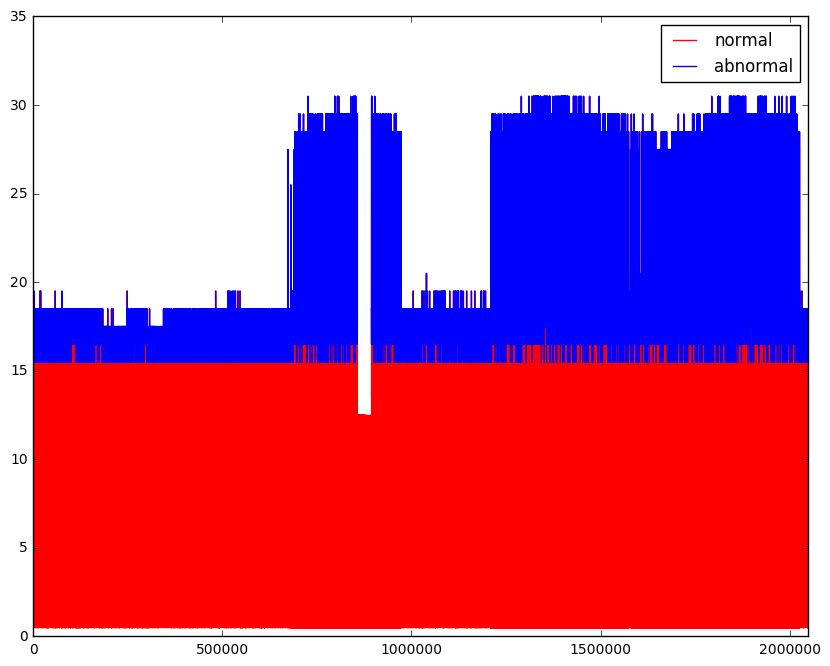

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
# g for column 3
# g1 for column 4


with open("/home/schanx/Documents/NeuHack/HackNEU/Hack2017GradCS/shantanu/g6.csv") as f:
    col = ['a','b']
    dta = pd.read_csv(f,names=col)
    
    #dta.columns = ['a', 'b']
print(len(dta['b']))

n_iter = len(dta['b'])
#n_iter = 50



sz = (n_iter,) # size of array
#x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
x = 6.45844735712055
#z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)
z = dta['b']
Q = 0.5 # process variance 1e-5 2e-3 1e-1

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect
delta=np.zeros(sz)
# intial guesses
xhat[0] = 0.0
P[0] = 1.0
f = open("/home/schanx/Documents/NeuHack/HackNEU/Hack2017GradCS/shantanu/delta_col9.csv","w+")
for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R)

    delta[k] = Pminus[k]-float(z[k])
    xhat[k] = xhatminus[k]+K[k]*float(z[k])-xhatminus[k]
    P[k] = (1-K[k])*Pminus[k]

for item in delta:
  f.write("%s\n" % item)

dataset_delta = pd.read_csv("/home/schanx/Documents/NeuHack/HackNEU/Hack2017GradCS/shantanu/delta_col9.csv")
dataset_delta = dataset_delta.abs()
threshold = dataset_delta.values.std() + dataset_delta.values.mean()
dataset_threshold = dataset_delta[dataset_delta >= threshold]
first = dataset_delta.plot(color='r')
dataset_threshold.plot(ax=first)
plt.legend(["normal","abnormal"])
plt.show()

In [10]:
dataset_delta.values.std()

3.2399622014684275